In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics.cluster import adjusted_rand_score
#fro sklearn.metrics import jaccard_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/

Mounted at /content/drive
MyDrive


In [3]:
path=r'/content/drive/MyDrive/llm project/person_2020_update.csv'


In [4]:
df=pd.read_csv(path)
print(list(df))

['id', 'wd_id', 'wp_id', 'slug', 'name', 'occupation', 'prob_ratio', 'gender', 'twitter', 'alive', 'l', 'hpi_raw', 'bplace_name', 'bplace_lat', 'bplace_lon', 'bplace_geonameid', 'bplace_country', 'birthdate', 'birthyear', 'dplace_name', 'dplace_lat', 'dplace_lon', 'dplace_geonameid', 'dplace_country', 'deathdate', 'deathyear', 'bplace_geacron_name', 'dplace_geacron_name', 'is_group', 'l_', 'age', 'non_en_page_views', 'coefficient_of_variation', 'hpi']


<ipython-input-4-0906bf7179b4>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path)


In [5]:
df

id      wd_id     wp_id  \
0         18934      Q9458     18934   
1      17414699       Q720  17414699   
2         18079       Q762     18079   
3         14627       Q935     14627   
4         17914       Q255     17914   
...         ...        ...       ...   
88932  64119467  Q95877306  64119467   
88933  61153000  Q64840184  61153000   
88934  63320558  Q87075301  63320558   
88935  62810909  Q83648587  62810909   
88936  63911513  Q93839274  63911513   

                                           slug                          name  \
0                                      Muhammad                      Muhammad   
1                                  Genghis_Khan                  Genghis Khan   
2                             Leonardo_da_Vinci             Leonardo da Vinci   
3                                  Isaac_Newton                  Isaac Newton   
4                          Ludwig_van_Beethoven          Ludwig van Beethoven   
...                                         ...                           ...   
88932                      Siarhei_Tsikhanouski          Siarhei Tsikhanouski   
88933                                Irfaan_Ali                    Irfaan Ali   
88934                  Guadalupe_Campanur_Tapia      Guadalupe Campanur Tapia   
88935                           Charli_D'Amelio               Charli D'Amelio   
88936  Prince_Charles_of_Luxembourg_(born_2020)  Prince Charles of Luxembourg   

               occupation  prob_ratio gender    twitter  alive  ...  \
0        RELIGIOUS FIGURE    0.000000      M        NaN  False  ...   
1      MILITARY PERSONNEL    0.000000      M        NaN  False  ...   
2                INVENTOR    0.000000      M        NaN  False  ...   
3               PHYSICIST    0.000000      M        NaN  False  ...   
4                COMPOSER    0.000000      M        NaN  False  ...   
...                   ...         ...    ...        ...    ...  ...   
88932            YOUTUBER    7.398064      M  strana888   True  ...   
88933          POLITICIAN  462.155254      M        NaN   True  ...   
88934     SOCIAL ACTIVIST    3.093662      F        NaN  False  ...   
88935            YOUTUBER    5.708478      F        NaN   True  ...   
88936            NOBLEMAN    1.647583      M        NaN   True  ...   

        deathdate  deathyear bplace_geacron_name  dplace_geacron_name  \
0      0632-06-08      632.0               Mecca                  NaN   
1      1227-08-18     1227.0                 NaN                  NaN   
2      1519-05-02     1519.0                 NaN                  NaN   
3      1727-03-31     1726.0                 NaN                  NaN   
4      1827-03-26     1827.0                 NaN              Austria   
...           ...        ...                 ...                  ...   
88932         NaN        NaN                 NaN                  NaN   
88933         NaN        NaN                 NaN                  NaN   
88934  2018-01-16     2018.0                 NaN                  NaN   
88935         NaN        NaN                 NaN                  NaN   
88936         NaN        NaN                 NaN                  NaN   

       is_group         l_     age non_en_page_views  \
0         False  27.918400  1450.0         5160422.0   
1         False  25.843621   858.0         3249211.0   
2         False  17.545406   568.0         5362406.0   
3         False  21.608920   378.0         3431331.0   
4         False  19.796430   250.0         5179518.0   
...         ...        ...     ...               ...   
88932     False        NaN    42.0               NaN   
88933     False        NaN    40.0               NaN   
88934     False        NaN    34.0               NaN   
88935     False        NaN    16.0               NaN   
88936     False        NaN     0.0               NaN   

       coefficient_of_variation         hpi  
0                      3.199355  100.000000  
1                      2.753641   97.723669  
2                 

In [6]:
#craeting buckets
#1. Male
df_male=df[df['gender']=='M']
df_male

id      wd_id     wp_id  \
0         18934      Q9458     18934   
1      17414699       Q720  17414699   
2         18079       Q762     18079   
3         14627       Q935     14627   
4         17914       Q255     17914   
...         ...        ...       ...   
88928  58980133  Q58278138  58980133   
88930  64563867  Q97357641  64563867   
88932  64119467  Q95877306  64119467   
88933  61153000  Q64840184  61153000   
88936  63911513  Q93839274  63911513   

                                           slug                          name  \
0                                      Muhammad                      Muhammad   
1                                  Genghis_Khan                  Genghis Khan   
2                             Leonardo_da_Vinci             Leonardo da Vinci   
3                                  Isaac_Newton                  Isaac Newton   
4                          Ludwig_van_Beethoven          Ludwig van Beethoven   
...                                         ...                           ...   
88928                                 Koki_Negi                     Koki Negi   
88930                            Polad_Hashimov                Polad Hashimov   
88932                      Siarhei_Tsikhanouski          Siarhei Tsikhanouski   
88933                                Irfaan_Ali                    Irfaan Ali   
88936  Prince_Charles_of_Luxembourg_(born_2020)  Prince Charles of Luxembourg   

               occupation  prob_ratio gender    twitter  alive  ...  \
0        RELIGIOUS FIGURE    0.000000      M        NaN  False  ...   
1      MILITARY PERSONNEL    0.000000      M        NaN  False  ...   
2                INVENTOR    0.000000      M        NaN  False  ...   
3               PHYSICIST    0.000000      M        NaN  False  ...   
4                COMPOSER    0.000000      M        NaN  False  ...   
...                   ...         ...    ...        ...    ...  ...   
88928       SOCCER PLAYER   71.357501      M        NaN   True  ...   
88930  MILITARY PERSONNEL    3.570849      M        NaN  False  ...   
88932            YOUTUBER    7.398064      M  strana888   True  ...   
88933          POLITICIAN  462.155254      M        NaN   True  ...   
88936            NOBLEMAN    1.647583      M        NaN   True  ...   

        deathdate  deathyear bplace_geacron_name  dplace_geacron_name  \
0      0632-06-08      632.0               Mecca                  NaN   
1      1227-08-18     1227.0                 NaN                  NaN   
2      1519-05-02     1519.0                 NaN                  NaN   
3      1727-03-31     1726.0                 NaN                  NaN   
4      1827-03-26     1827.0                 NaN              Austria   
...           ...        ...                 ...                  ...   
88928         NaN        NaN                 NaN                  NaN   
88930  2020-07-14     2020.0                 NaN                  NaN   
88932         NaN        NaN                 NaN                  NaN   
88933         NaN        NaN                 NaN                  NaN   
88936         NaN        NaN                 NaN                  NaN   

       is_group         l_     age non_en_page_views  \
0         False  27.918400  1450.0         5160422.0   
1         False  25.843621   858.0         3249211.0   
2         False  17.545406   568.0         5362406.0   
3         False  21.608920   378.0         3431331.0   
4         False  19.796430   250.0         5179518.0   
...         ...        ...     ...               ...   
88928     False   1.682495    20.0              58.0   
88930     False        NaN    45.0               NaN   
88932     False        NaN    42.0               NaN   
88933     False        NaN    40.0               NaN   
88936     False        NaN     0.0               NaN   

       coefficient_of_variation         hpi  
0                      3.199355  100.000000  
1                      2.753641   97.723669  
2                 

In [8]:
#export to csv
df_male.to_csv('/content/drive/MyDrive/llm project/male_profile.csv',index=False)

In [9]:
#craeting buckets
#1. Female
df_female=df[df['gender']=='F']
df_female
df_female.to_csv('/content/drive/MyDrive/llm project/female_profile.csv',index=False)

In [10]:
df_female

id      wd_id     wp_id                      slug  \
37        73513       Q345     73513     Mary,_mother_of_Jesus   
39     12153654      Q9682  12153654              Elizabeth_II   
48        16509      Q7226     16509               Joan_of_Arc   
75        10128      Q7207     10128    Elizabeth_I_of_England   
78        20408      Q7186     20408               Marie_Curie   
...         ...        ...       ...                       ...   
88922  64613100  Q97010473  64613100  Sviatlana_Tsikhanouskaya   
88926  63552227  Q86913858  63552227                Islam_Bibi   
88929  63348148  Q87075035  63348148            Anna_Sharyhina   
88934  63320558  Q87075301  63320558  Guadalupe_Campanur_Tapia   
88935  62810909  Q83648587  62810909           Charli_D'Amelio   

                           name          occupation  prob_ratio gender  \
37        Mary, mother of Jesus    RELIGIOUS FIGURE    0.000000      F   
39                 Elizabeth II            NOBLEMAN    0.000000      F   
48                  Joan of Arc  MILITARY PERSONNEL    0.000000      F   
75       Elizabeth I of England          POLITICIAN    0.000000      F   
78                  Marie Curie           PHYSICIST    0.000000      F   
...                         ...                 ...         ...    ...   
88922  Sviatlana Tsikhanouskaya          POLITICIAN   75.891750      F   
88926                Islam Bibi  MILITARY PERSONNEL    1.195601      F   
88929            Anna Sharyhina     SOCIAL ACTIVIST    6.630937      F   
88934  Guadalupe Campanur Tapia     SOCIAL ACTIVIST    3.093662      F   
88935           Charli D'Amelio            YOUTUBER    5.708478      F   

         twitter  alive  ...   deathdate  deathyear bplace_geacron_name  \
37           NaN  False  ...         NaN      100.0                 NaN   
39           NaN   True  ...         NaN        NaN      United Kingdom   
48           NaN  False  ...  1431-05-30     1431.0                 NaN   
75           NaN  False  ...  1603-03-24     1603.0             England   
78           NaN  False  ...  1934-07-04     1934.0              Russia   
...          ...    ...  ...         ...        ...                 ...   
88922  strana888   True  ...         NaN        NaN                 NaN   
88926        NaN  False  ...  2013-07-04     2013.0                 NaN   
88929        NaN   True  ...         NaN        NaN                 NaN   
88934        NaN  False  ...  2018-01-16     2018.0                 NaN   
88935        NaN   True  ...         NaN        NaN                 NaN   

       dplace_geacron_name  is_group         l_     age non_en_page_views  \
37                     NaN     False  18.209114  2120.0         1847321.0   
39                     NaN     False  11.342987    94.0        13621472.0   
48                     NaN     False  12.886659   608.0         2874850.0   
75                     NaN     False   9.883985   487.0         3677813.0   
78                     NaN     False  11.292510   153.0         4194076.0   
...                    ...       ...        ...     ...               ...   
88922                  NaN     False        NaN    38.0               NaN   
88926                  NaN     False        NaN    46.0               NaN   
88929                  NaN     False        NaN    42.0               NaN   
88934                  NaN     False        NaN    34.0               NaN   
88935                  NaN     False        NaN    16.0               NaN   

       coefficient_of_variation        hpi  
37                     3.741950  93.212554  
39                     5.545789  93.047770  
48                     4.304805  92.461685  
75                     5.459154  90.907424  
78                     5.497696  90.853373  
...                         ...        ...  
88922                       NaN  23.955545  
88926                       NaN  22.732048  
88929                       NaN  20.637512  
88934                       NaN  16.355506  
88935     

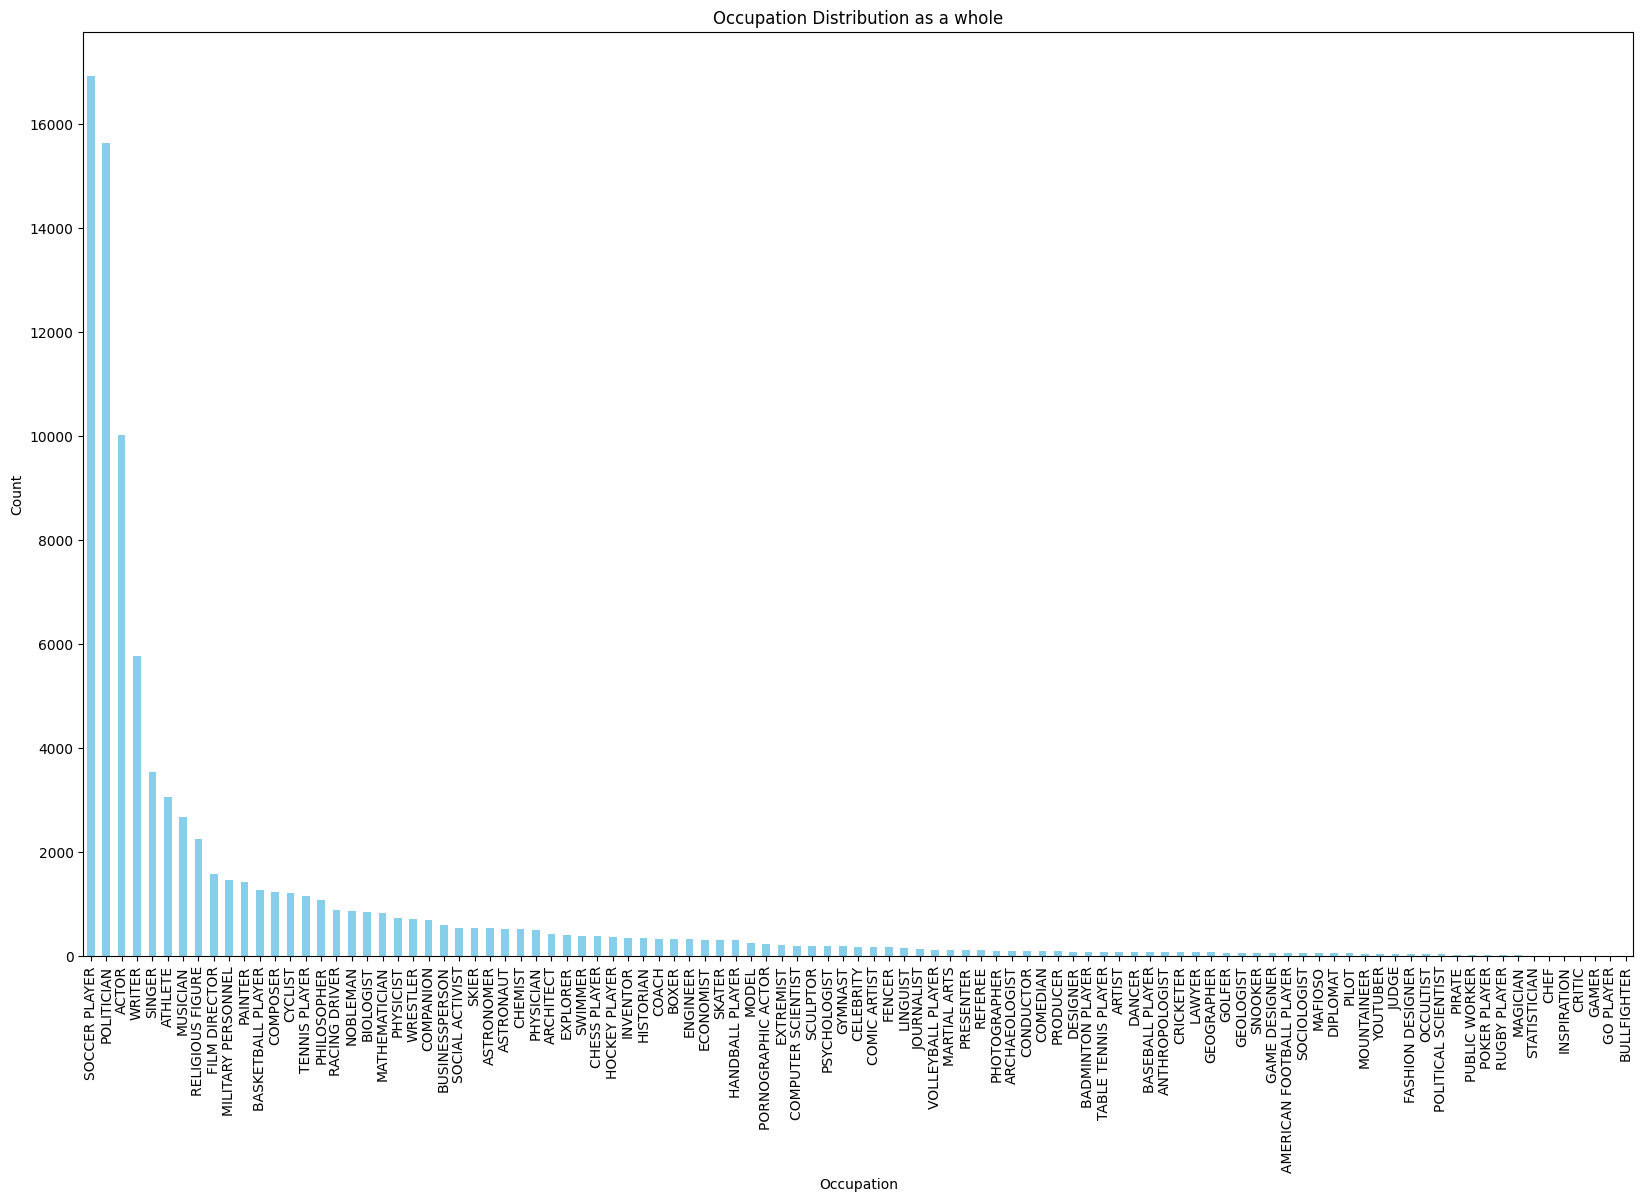

In [11]:
#check occupation catregories
occupation_counts = df['occupation'].value_counts()
plt.figure(figsize=(20,12))
occupation_counts.plot(kind='bar', color='skyblue')
plt.title('Occupation Distribution as a whole')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()



<ipython-input-12-f6ae5786bc4b>:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_male=pd.read_csv(path)


['id', 'wd_id', 'wp_id', 'slug', 'name', 'occupation', 'prob_ratio', 'gender', 'twitter', 'alive', 'l', 'hpi_raw', 'bplace_name', 'bplace_lat', 'bplace_lon', 'bplace_geonameid', 'bplace_country', 'birthdate', 'birthyear', 'dplace_name', 'dplace_lat', 'dplace_lon', 'dplace_geonameid', 'dplace_country', 'deathdate', 'deathyear', 'bplace_geacron_name', 'dplace_geacron_name', 'is_group', 'l_', 'age', 'non_en_page_views', 'coefficient_of_variation', 'hpi']


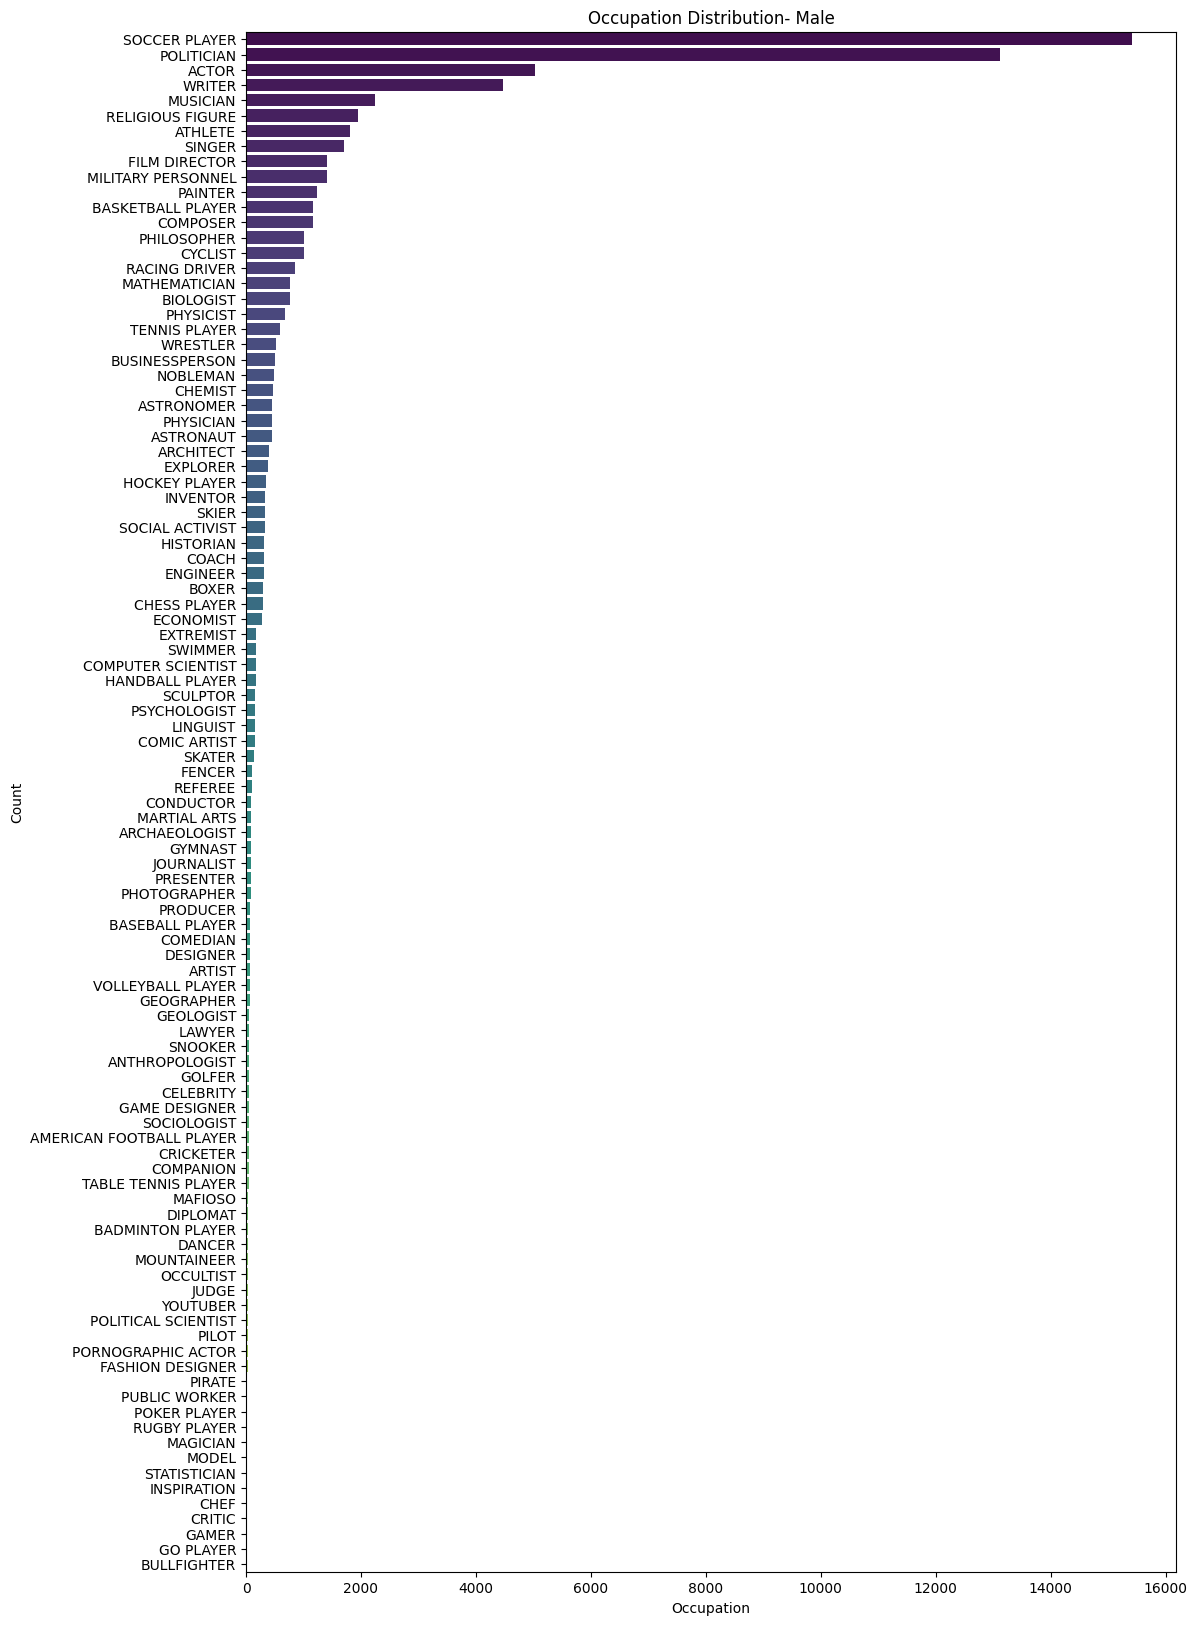

In [12]:
#check occupation in male catregories
path=r'/content/drive/MyDrive/llm project/male_profile.csv'
df_male=pd.read_csv(path)
print(list(df_male))

occupation_counts = df_male['occupation'].value_counts()
plt.figure(figsize=(12,20))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='viridis')
plt.title('Occupation Distribution- Male')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()



<ipython-input-13-2aefad1bde47>:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_female=pd.read_csv(path)


['id', 'wd_id', 'wp_id', 'slug', 'name', 'occupation', 'prob_ratio', 'gender', 'twitter', 'alive', 'l', 'hpi_raw', 'bplace_name', 'bplace_lat', 'bplace_lon', 'bplace_geonameid', 'bplace_country', 'birthdate', 'birthyear', 'dplace_name', 'dplace_lat', 'dplace_lon', 'dplace_geonameid', 'dplace_country', 'deathdate', 'deathyear', 'bplace_geacron_name', 'dplace_geacron_name', 'is_group', 'l_', 'age', 'non_en_page_views', 'coefficient_of_variation', 'hpi']


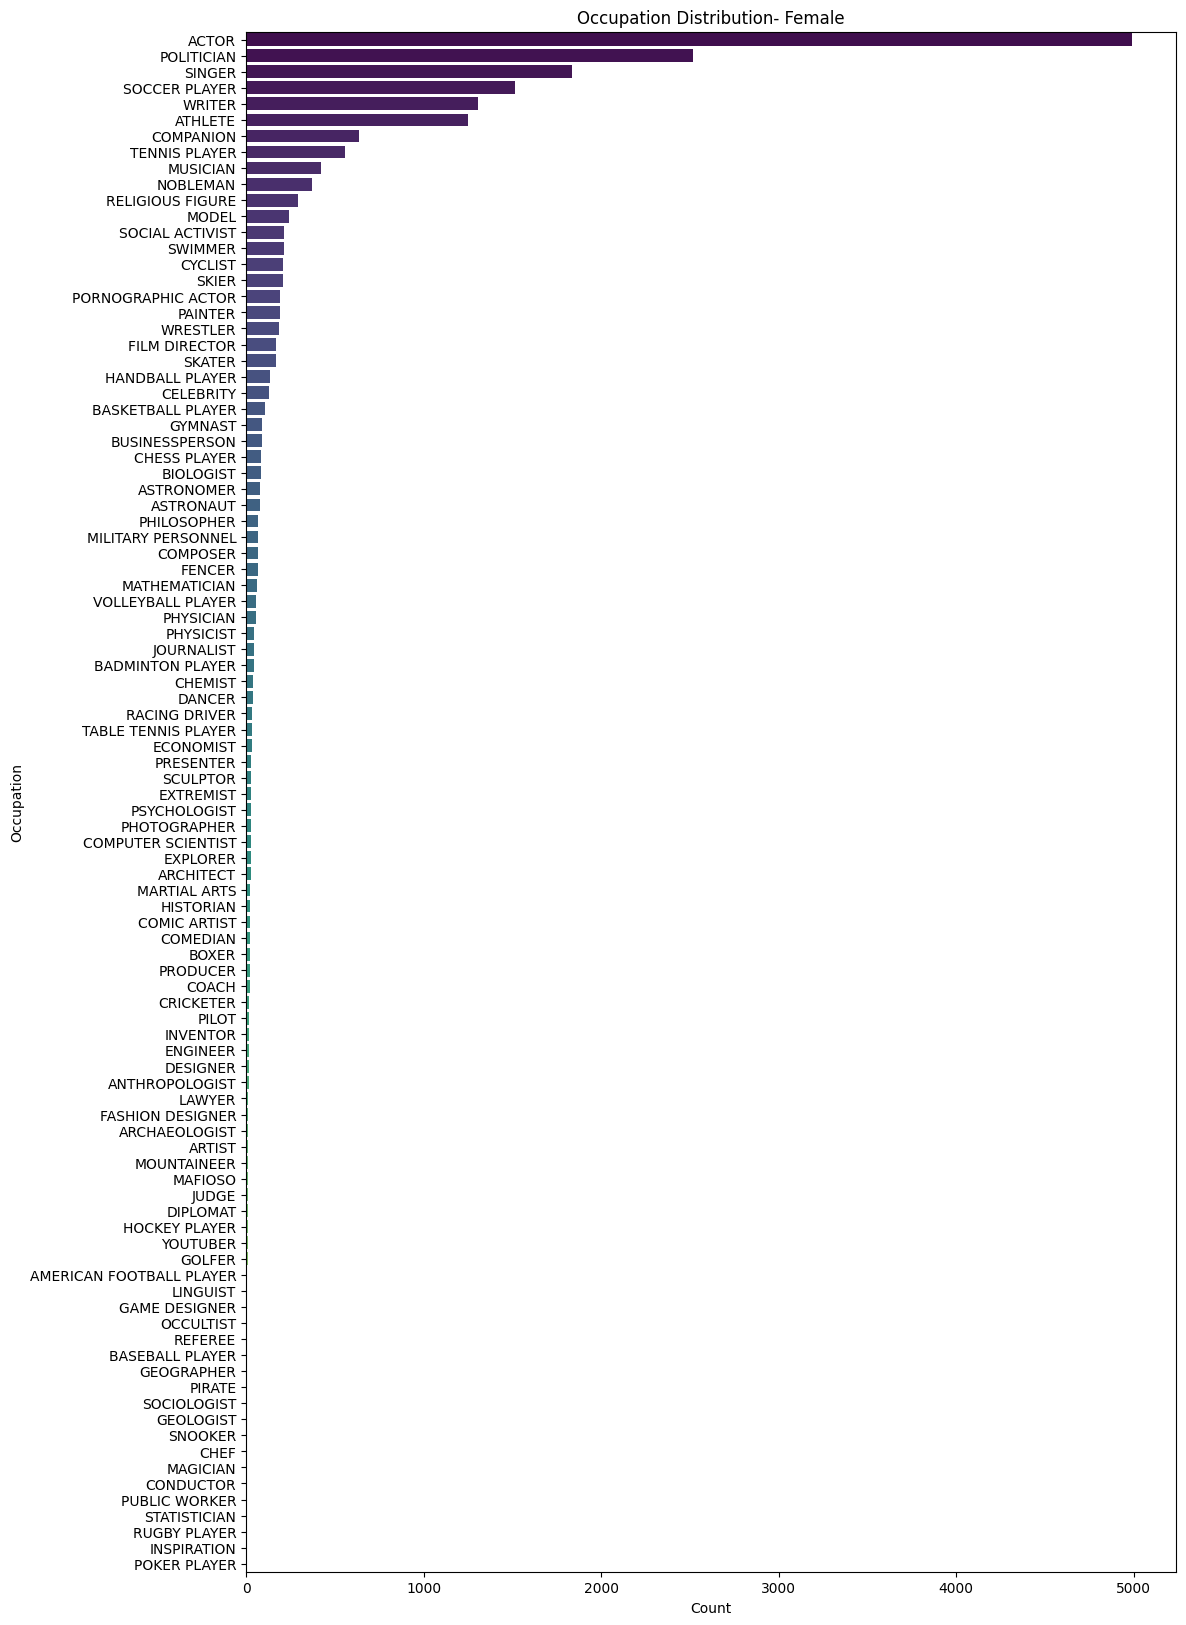

In [13]:
#check occupation in female catregories
path=r'/content/drive/MyDrive/llm project/female_profile.csv'
df_female=pd.read_csv(path)
print(list(df_female))

occupation_counts = df_female['occupation'].value_counts()
plt.figure(figsize=(12,20))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='viridis')
plt.title('Occupation Distribution- Female')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()



In [14]:
#birthplace distribution
df


id      wd_id     wp_id  \
0         18934      Q9458     18934   
1      17414699       Q720  17414699   
2         18079       Q762     18079   
3         14627       Q935     14627   
4         17914       Q255     17914   
...         ...        ...       ...   
88932  64119467  Q95877306  64119467   
88933  61153000  Q64840184  61153000   
88934  63320558  Q87075301  63320558   
88935  62810909  Q83648587  62810909   
88936  63911513  Q93839274  63911513   

                                           slug                          name  \
0                                      Muhammad                      Muhammad   
1                                  Genghis_Khan                  Genghis Khan   
2                             Leonardo_da_Vinci             Leonardo da Vinci   
3                                  Isaac_Newton                  Isaac Newton   
4                          Ludwig_van_Beethoven          Ludwig van Beethoven   
...                                         ...                           ...   
88932                      Siarhei_Tsikhanouski          Siarhei Tsikhanouski   
88933                                Irfaan_Ali                    Irfaan Ali   
88934                  Guadalupe_Campanur_Tapia      Guadalupe Campanur Tapia   
88935                           Charli_D'Amelio               Charli D'Amelio   
88936  Prince_Charles_of_Luxembourg_(born_2020)  Prince Charles of Luxembourg   

               occupation  prob_ratio gender    twitter  alive  ...  \
0        RELIGIOUS FIGURE    0.000000      M        NaN  False  ...   
1      MILITARY PERSONNEL    0.000000      M        NaN  False  ...   
2                INVENTOR    0.000000      M        NaN  False  ...   
3               PHYSICIST    0.000000      M        NaN  False  ...   
4                COMPOSER    0.000000      M        NaN  False  ...   
...                   ...         ...    ...        ...    ...  ...   
88932            YOUTUBER    7.398064      M  strana888   True  ...   
88933          POLITICIAN  462.155254      M        NaN   True  ...   
88934     SOCIAL ACTIVIST    3.093662      F        NaN  False  ...   
88935            YOUTUBER    5.708478      F        NaN   True  ...   
88936            NOBLEMAN    1.647583      M        NaN   True  ...   

        deathdate  deathyear bplace_geacron_name  dplace_geacron_name  \
0      0632-06-08      632.0               Mecca                  NaN   
1      1227-08-18     1227.0                 NaN                  NaN   
2      1519-05-02     1519.0                 NaN                  NaN   
3      1727-03-31     1726.0                 NaN                  NaN   
4      1827-03-26     1827.0                 NaN              Austria   
...           ...        ...                 ...                  ...   
88932         NaN        NaN                 NaN                  NaN   
88933         NaN        NaN                 NaN                  NaN   
88934  2018-01-16     2018.0                 NaN                  NaN   
88935         NaN        NaN                 NaN                  NaN   
88936         NaN        NaN                 NaN                  NaN   

       is_group         l_     age non_en_page_views  \
0         False  27.918400  1450.0         5160422.0   
1         False  25.843621   858.0         3249211.0   
2         False  17.545406   568.0         5362406.0   
3         False  21.608920   378.0         3431331.0   
4         False  19.796430   250.0         5179518.0   
...         ...        ...     ...               ...   
88932     False        NaN    42.0               NaN   
88933     False        NaN    40.0               NaN   
88934     False        NaN    34.0               NaN   
88935     False        NaN    16.0               NaN   
88936     False        NaN     0.0               NaN   

       coefficient_of_variation         hpi  
0                      3.199355  100.000000  
1                      2.753641   97.723669  
2                 

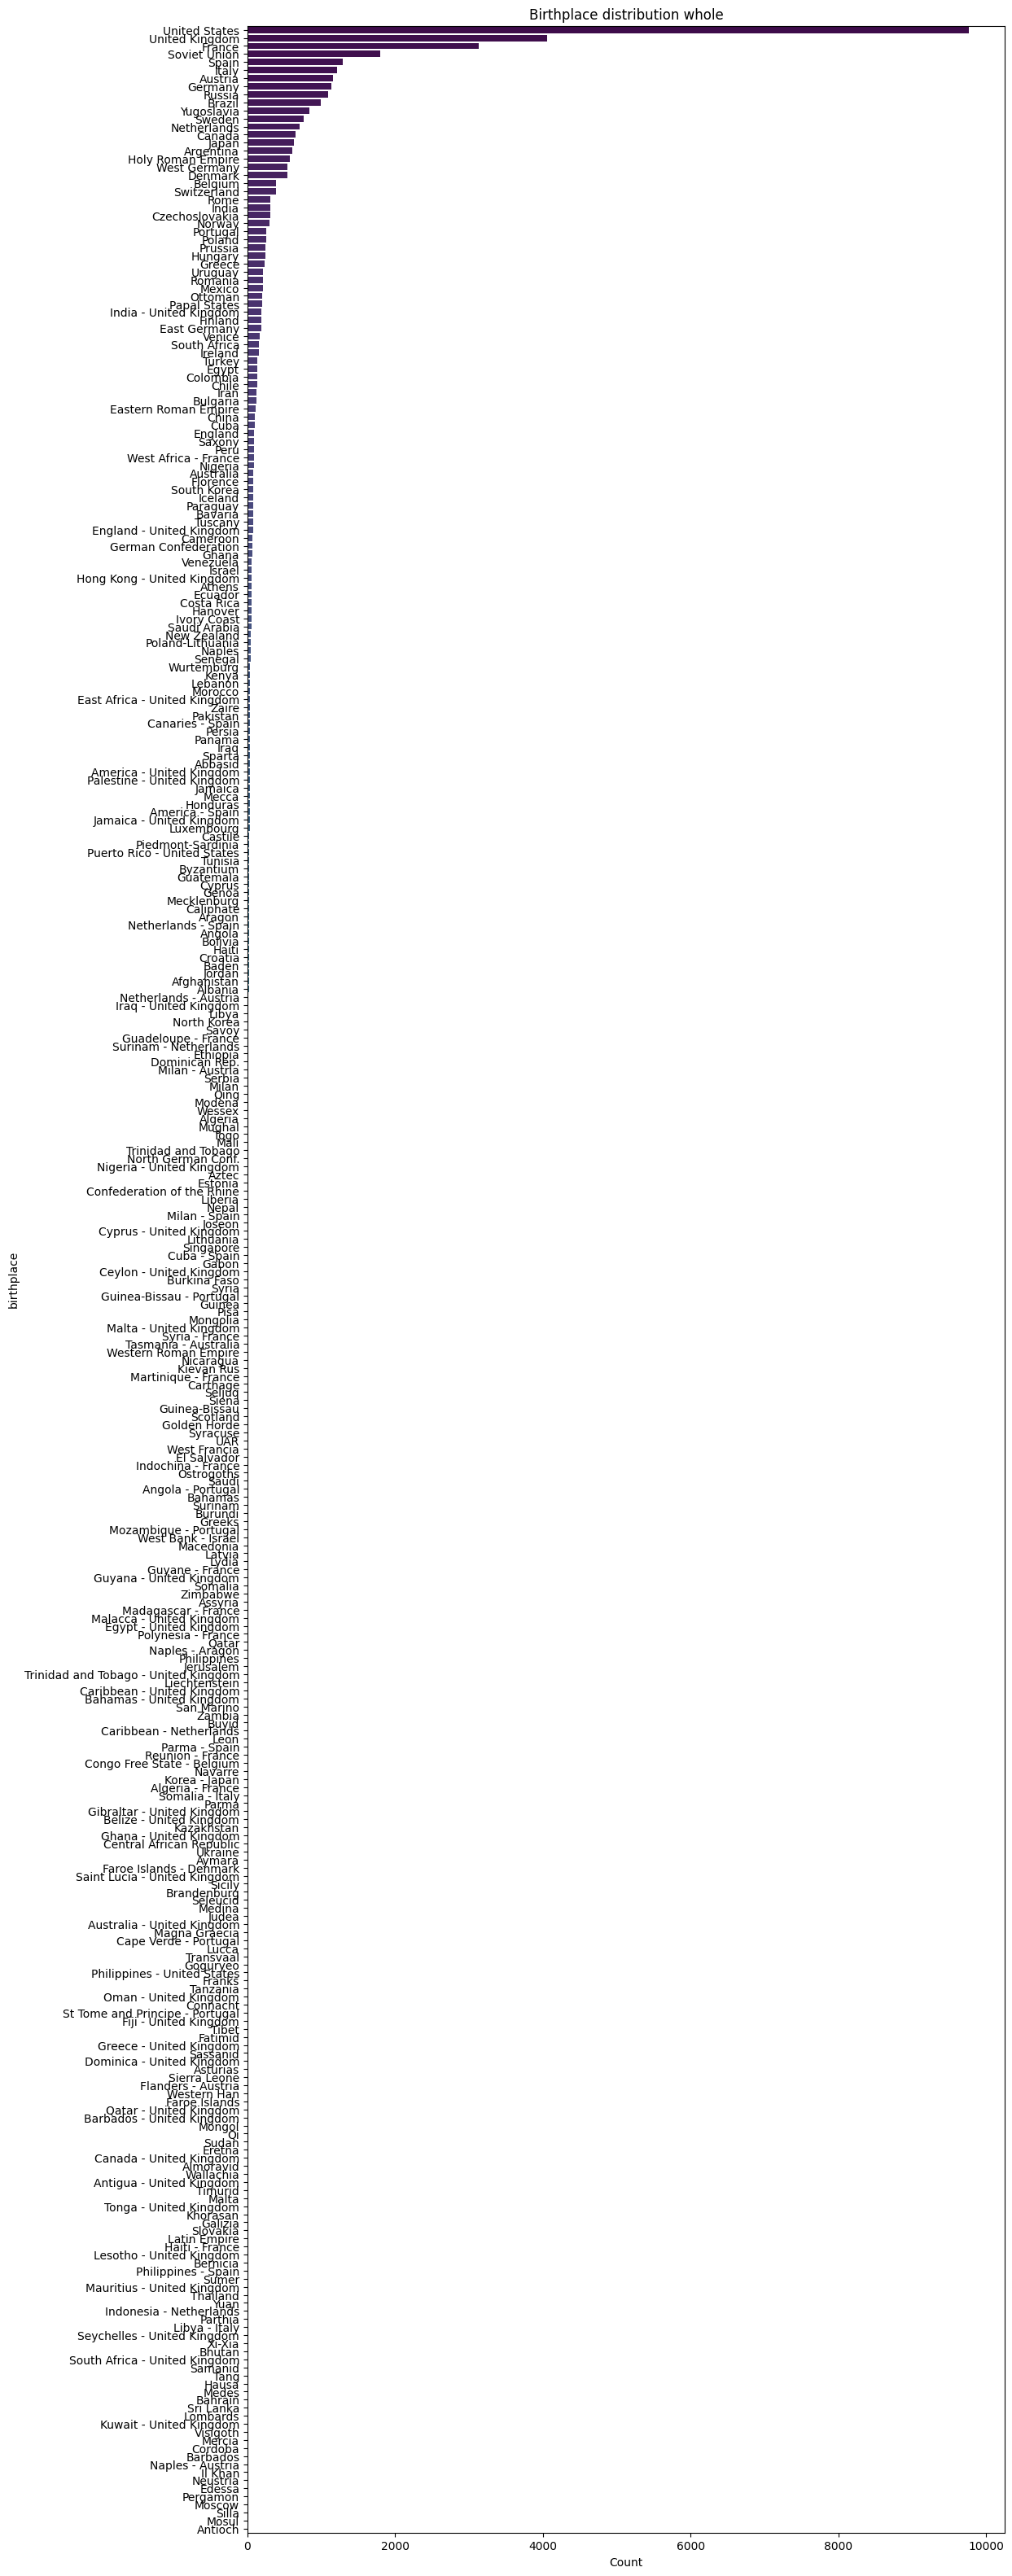

In [18]:
#df
birthplace = df['bplace_geacron_name'].value_counts()
plt.figure(figsize=(12,40))
sns.barplot(x=birthplace.values, y=birthplace.index, palette='viridis')
plt.title('Birthplace distribution whole')
plt.xlabel('Count')
plt.ylabel('birthplace')
plt.show()



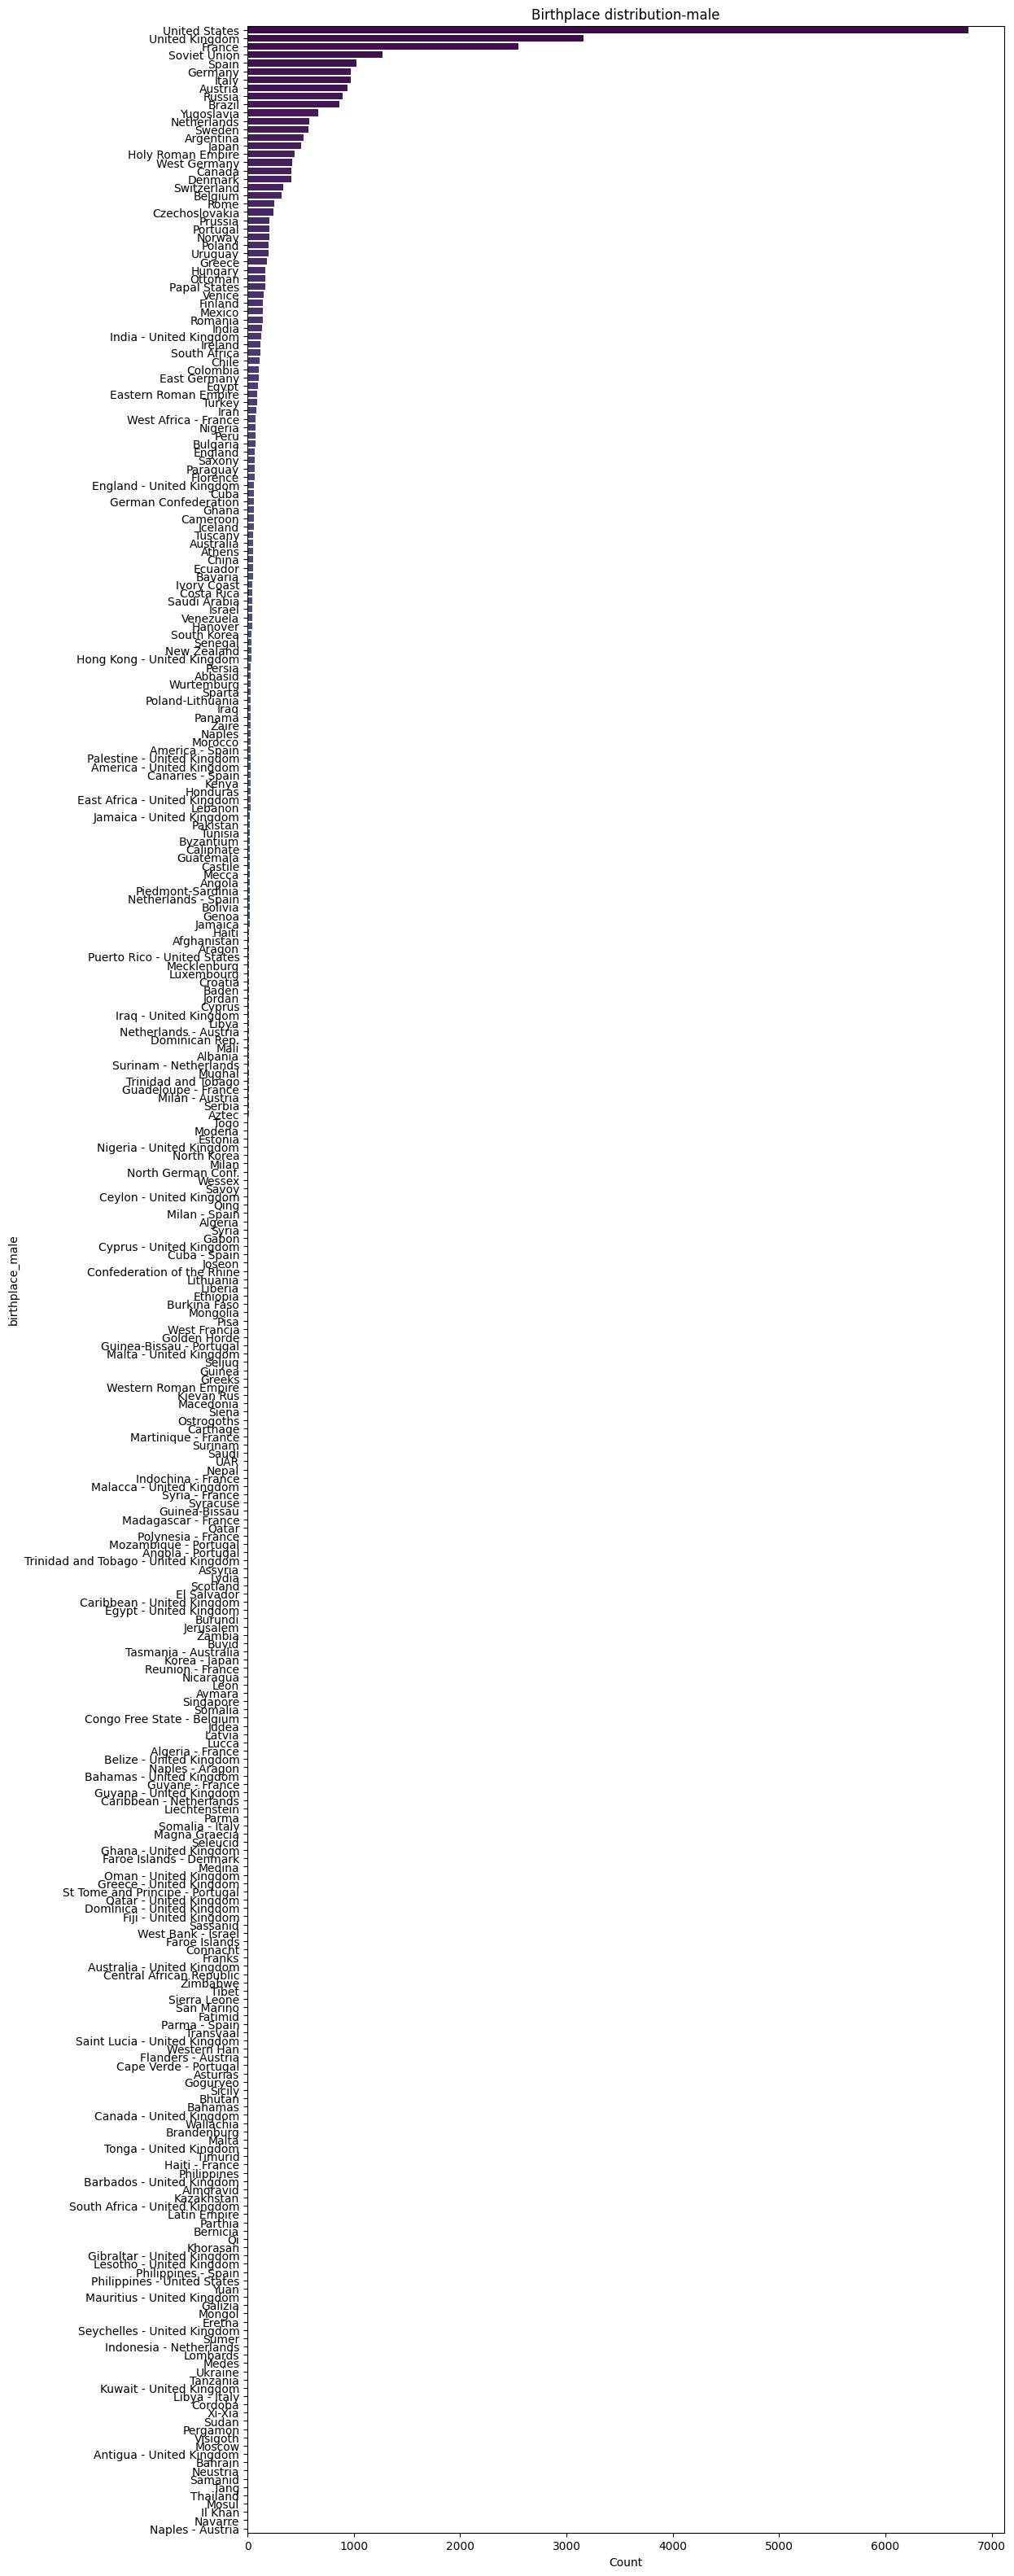

In [19]:
#birthplace distribution male
birthplace_M = df_male['bplace_geacron_name'].value_counts()
plt.figure(figsize=(12,40))
sns.barplot(x=birthplace_M .values, y=birthplace_M .index, palette='viridis')
plt.title('Birthplace distribution-male')
plt.xlabel('Count')
plt.ylabel('birthplace_male')
plt.show()



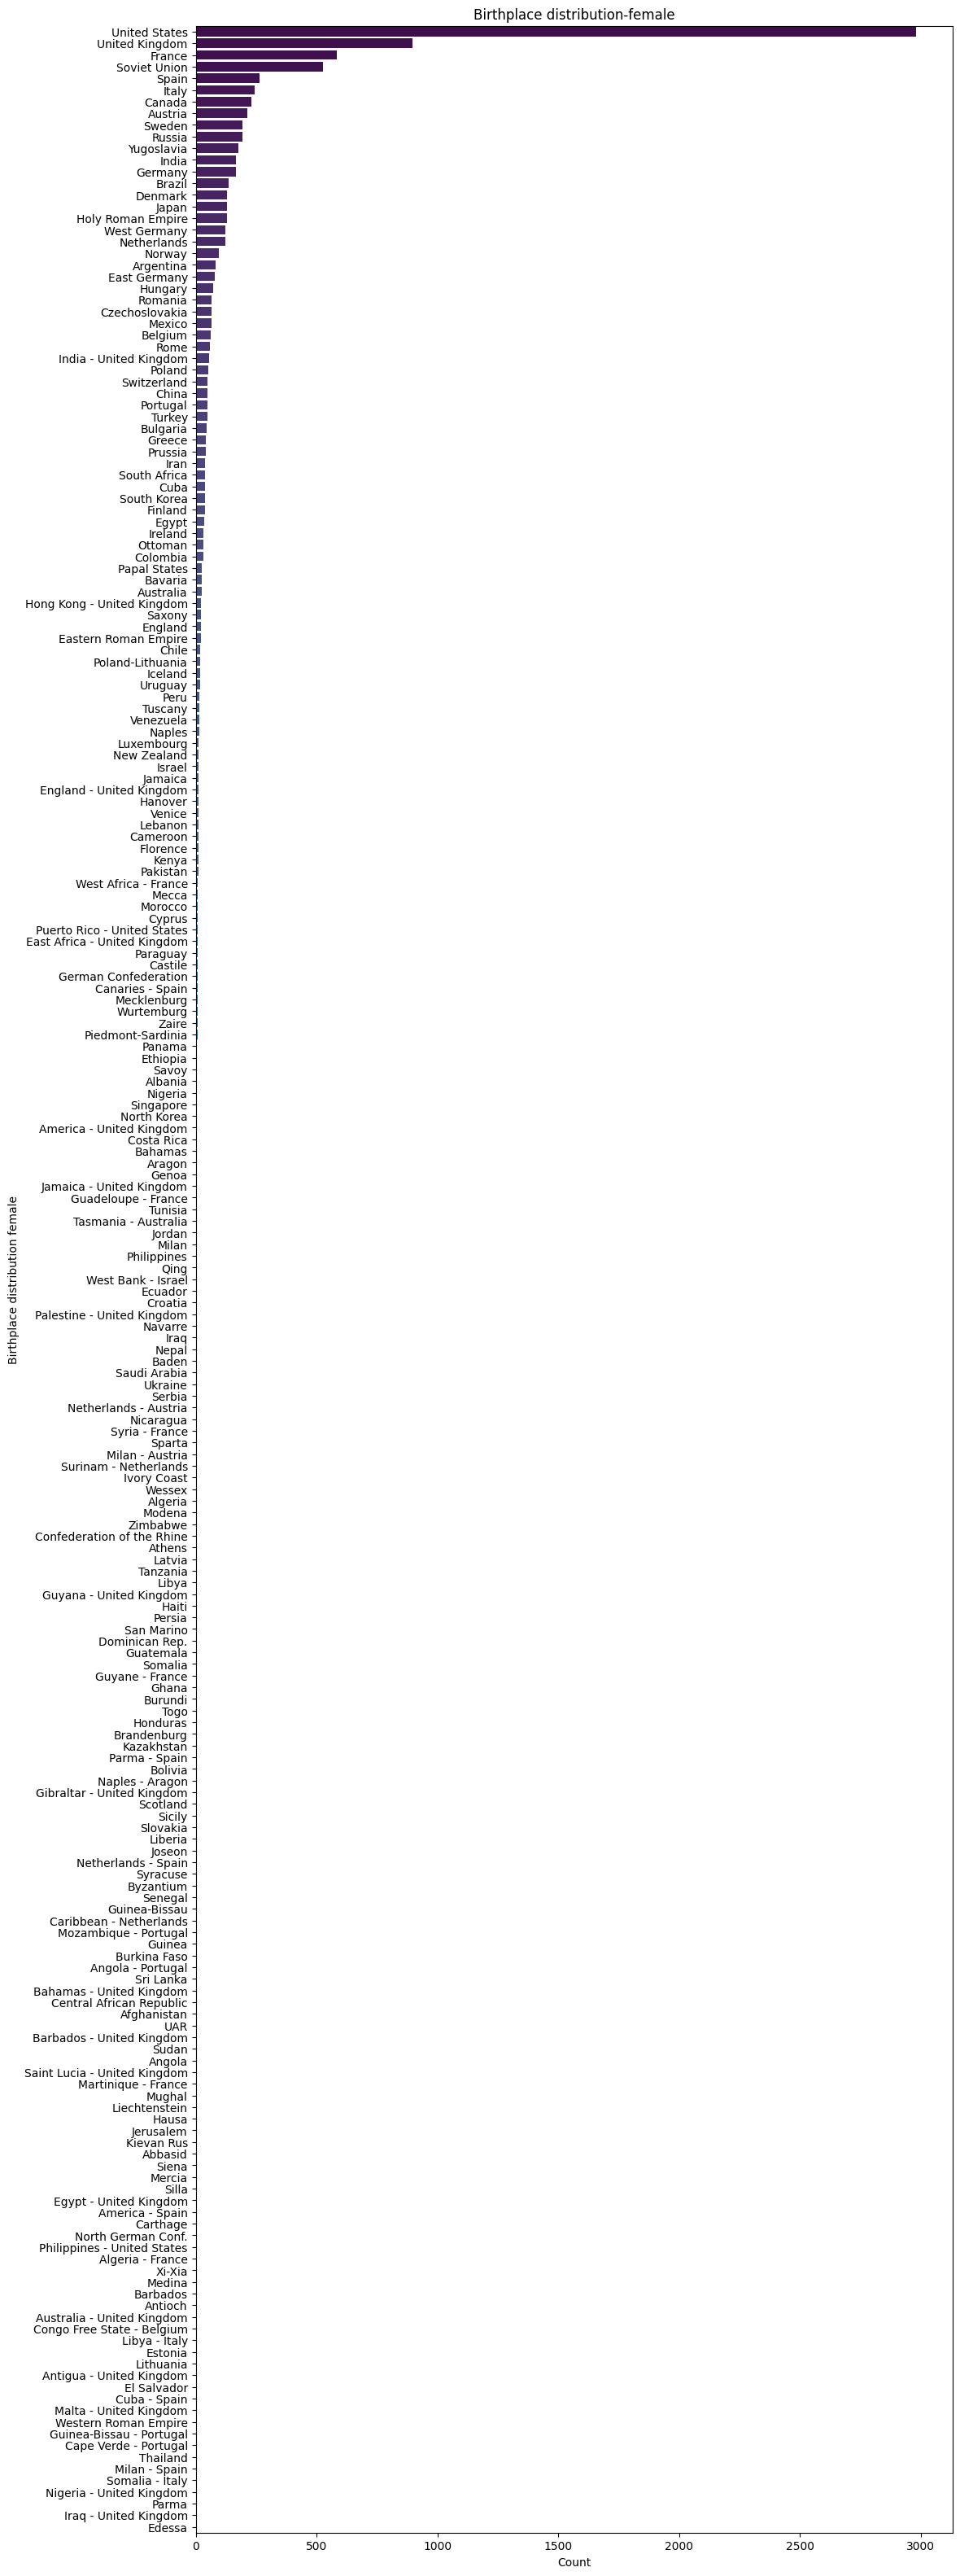

In [20]:
#birthplace distribution female
birthplace_FM = df_female['bplace_geacron_name'].value_counts()
plt.figure(figsize=(12,40))
sns.barplot(x=birthplace_FM.values, y=birthplace_FM.index, palette='viridis')
plt.title('Birthplace distribution-female')
plt.xlabel('Count')
plt.ylabel('Birthplace distribution female')
plt.show()



In [23]:
!pip install wordcloud pandas matplotlib



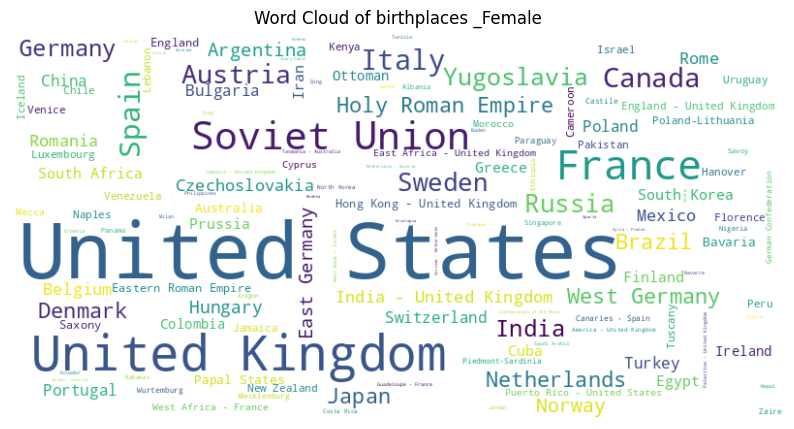

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame (Replace this with your actual DataFrame)


# Grouping the occupations and counting their occurrences


# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(birthplace_FM)

# Displaying the WordCloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of birthplaces _Female')
plt.show()



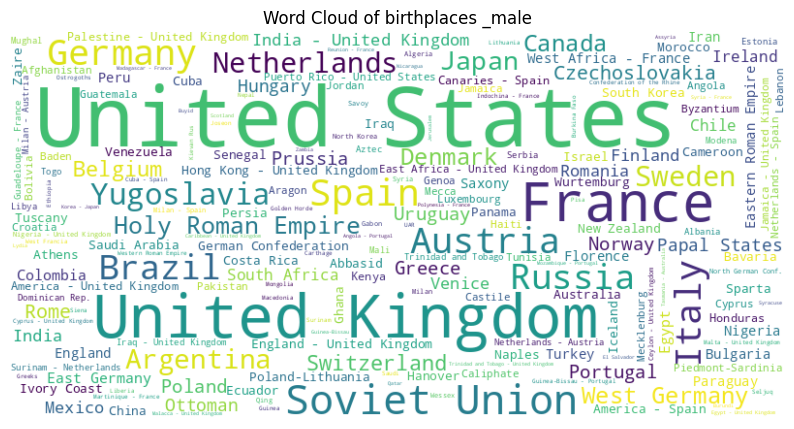

In [26]:
# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(birthplace_M)

# Displaying the WordCloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of birthplaces _male')
plt.show()



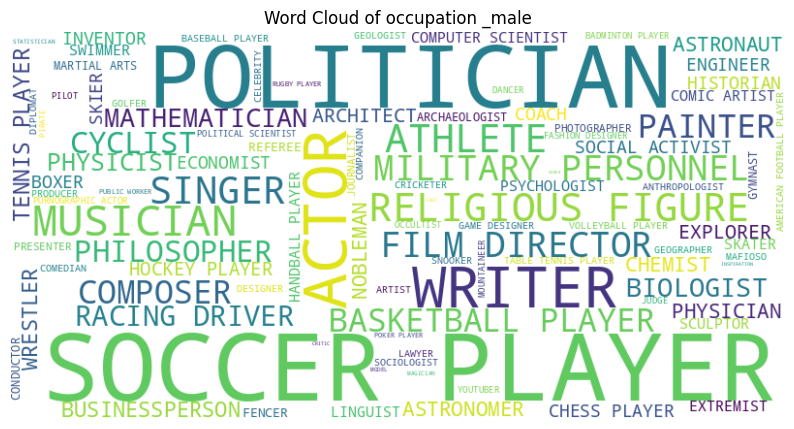

In [28]:
#world cloud occupation male
# Creating a WordCloud object
occupation_counts = df_male['occupation'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occupation_counts)
# Displaying the WordCloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of occupation _male')
plt.show()


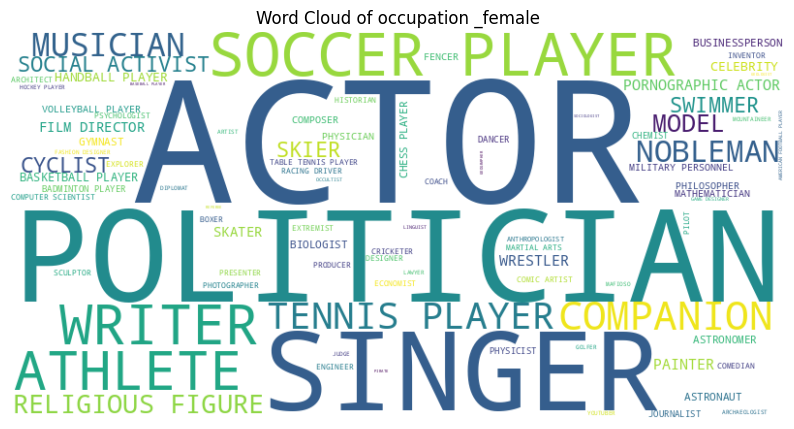

In [29]:
#world cloud occupation male
# Creating a WordCloud object
occupation_counts = df_female['occupation'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occupation_counts)
# Displaying the WordCloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of occupation _female')
plt.show()

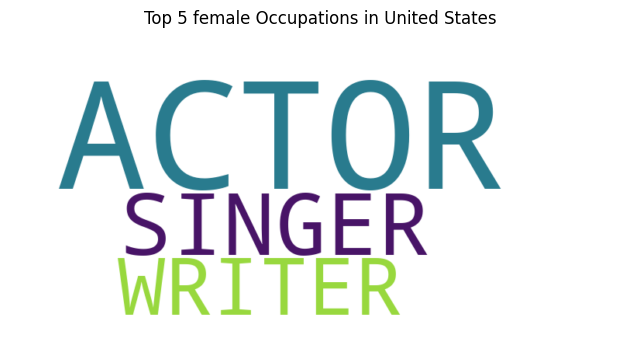

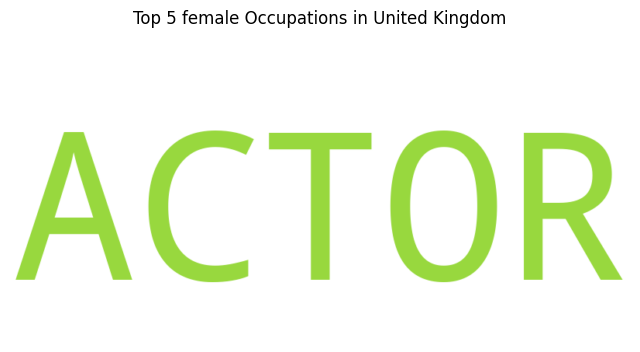

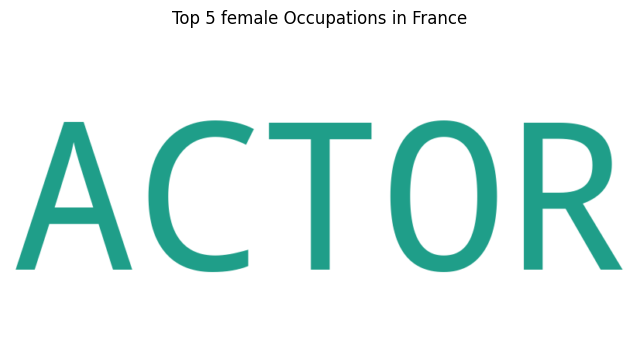

In [51]:


import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt




# Grouping the data by Country and Occupation and counting their occurrences
grouped_data = df_female.groupby(['bplace_geacron_name', 'occupation']).size().reset_index(name='count')

# Sort by count in descending order and select top 5 combinations
top_combinations = grouped_data.sort_values(by='count', ascending=False).head(5)

# Creating a dictionary of word frequencies for each selected combination
word_freq = {}
for index, row in top_combinations.iterrows():
    country = row['bplace_geacron_name']
    occupation = row['occupation']
    count = row['count']

    if country not in word_freq:
        word_freq[country] = {}
    word_freq[country][occupation] = count

# Creating separate word clouds for each selected combination
for country, freq in word_freq.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top 5 female Occupations in {country}')
    plt.axis('off')
    plt.show()


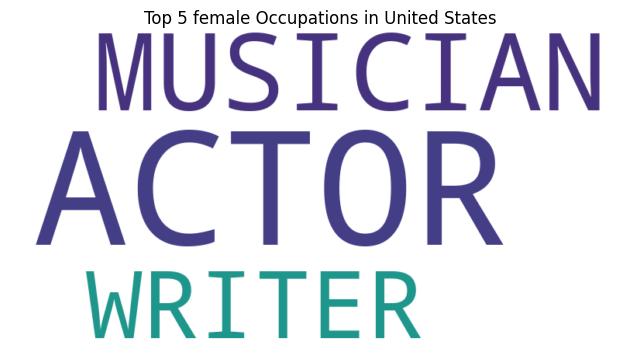

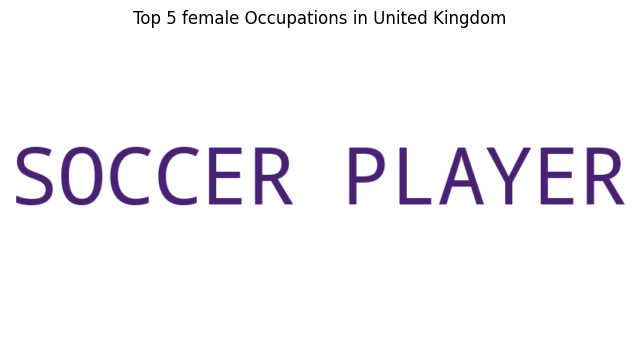

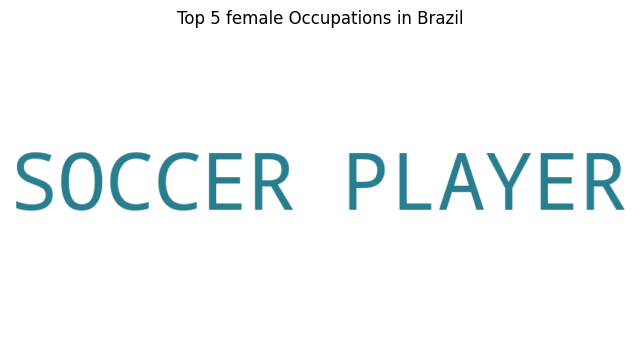

In [52]:
# Grouping the data by Country and Occupation and counting their occurrences
grouped_data = df_male.groupby(['bplace_geacron_name', 'occupation']).size().reset_index(name='count')

# Sort by count in descending order and select top 5 combinations
top_combinations = grouped_data.sort_values(by='count', ascending=False).head(5)

# Creating a dictionary of word frequencies for each selected combination
word_freq = {}
for index, row in top_combinations.iterrows():
    country = row['bplace_geacron_name']
    occupation = row['occupation']
    count = row['count']

    if country not in word_freq:
        word_freq[country] = {}
    word_freq[country][occupation] = count

# Creating separate word clouds for each selected combination
for country, freq in word_freq.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top 5 female Occupations in {country}')
    plt.axis('off')
    plt.show()


In [32]:
#create a bucket of female soccer players
df_FM_soccer=df_female[df_female['occupation']=='SOCCER PLAYER']

df_FM_soccer

id      wd_id     wp_id                slug                name  \
1760    6989826    Q982732   6989826       Joaquín_Peiró       Joaquín Peiró   
1907   11672708   Q2565969  11672708        Jair_Marinho        Jair Marinho   
2048   56784757  Q50375379  56784757     Kazuko_Hironaka     Kazuko Hironaka   
2589   56792230  Q50377926  56792230        Yuki_Fushimi        Yuki Fushimi   
3122    9635650    Q257761   9635650        László_Budai        László Budai   
...         ...        ...       ...                 ...                 ...   
19949  30721691   Q3304415  30721691  Meghan_Klingenberg  Meghan Klingenberg   
19957  49205127  Q22249639  49205127        Mallory_Pugh        Mallory Pugh   
19963  62198787  Q72921909  62198787       Neco_Williams       Neco Williams   
19964   4112069    Q265778   4112069        Adam_Hammill        Adam Hammill   
19975  36748433   Q5249348  36748433         Declan_John         Declan John   

          occupation   prob_ratio gender      twitter  alive  ...   deathdate  \
1760   SOCCER PLAYER     8.183539      F          NaN  False  ...  2020-03-18   
1907   SOCCER PLAYER    25.703770      F          NaN  False  ...  2020-03-07   
2048   SOCCER PLAYER    43.753854      F          NaN   True  ...         NaN   
2589   SOCCER PLAYER    43.753854      F          NaN   True  ...         NaN   
3122   SOCCER PLAYER    28.261006      F          NaN  False  ...  1983-07-02   
...              ...          ...    ...          ...    ...  ...         ...   
19949  SOCCER PLAYER    53.649510      F  meghankling   True  ...         NaN   
19957  SOCCER PLAYER   245.271967      F      MalPugh   True  ...         NaN   
19963  SOCCER PLAYER   328.551174      F          NaN   True  ...         NaN   
19964  SOCCER PLAYER  1179.775437      F          NaN   True  ...         NaN   
19975  SOCCER PLAYER    51.302050      F          NaN   True  ...         NaN   

       deathyear bplace_geacron_name  dplace_geacron_name  is_group  \
1760      2020.0               Spain                  NaN     False   
1907      2020.0                 NaN                  NaN     False   
2048         NaN               Japan                  NaN     False   
2589         NaN               Japan                  NaN     False   
3122      1983.0             Hungary              Hungary     False   
...          ...                 ...                  ...       ...   
19949        NaN       United States                  NaN     False   
19957        NaN                 NaN                  NaN      True   
19963        NaN                 NaN                  NaN     False   
19964        NaN      United Kingdom                  NaN     False   
19975        NaN                 NaN                  NaN     False   

              l_    age non_en_page_views  coefficient_of_variation        hpi  
1760    5.684481   84.0           73220.0                  1.716810  69.375398  
1907    8.982724   84.0           20032.0                  1.163658  68.944035  
2048   25.552809  110.0             440.0                  0.865784  68.549436  
2589   23.893349  110.0             334.0                  0.936954  67.337723  
3122    7.505313   92.0           10995.0                  1.990733  66.262799  
...          ...    ...               ...                       ...        ...  
19949   1.376600   32.0            1369.0                  3.394743  32.080666  
19957   1.356575   22.0            5032.0                  3.532967  31.687390  
19963   1.093693   19.0            3143.0                  1.377757  30.896147  
19964   1.297440   32.0             728.0                  3.834836  30.823575  
19975   1.352995   25.0            1355.0                  3.409523  29.348854  

[1515 rows x 34 columns]

In [34]:
#create a bucket of female soccer players IN US
df_FM_soccer_US=df_FM_soccer[df_FM_soccer['bplace_geacron_name']=='United States']

df_FM_soccer_US.to_csv('/content/drive/MyDrive/llm project/FM_soccer_US.csv',index=False)

In [42]:
#create a bucket of female soccer players IN UK

df_FM_soccer_UK=df_FM_soccer[df_FM_soccer['bplace_geacron_name']=='United Kingdom']
df_FM_soccer_UK
df_FM_soccer_UK.to_csv('/content/drive/MyDrive/llm project/FM_soccer_UK.csv',index=False)




In [85]:
#create a bucket of male soccer players IN UK
df_M_soccer_UK=df_M_soccer[df_M_soccer['bplace_geacron_name']=='United Kingdom']
df_M_soccer_UK
df_M_soccer_UK.to_csv('/content/drive/MyDrive/llm project/M_soccer_UK.csv',index=False)


id      wd_id     wp_id              slug              name  \
134       24953     Q12897     24953              Pelé              Pelé   
581    26276416     Q17163  26276416      Johan_Cruyff      Johan Cruyff   
647      205150    Q482931    205150     Ferenc_Puskás     Ferenc Puskás   
681      700574    Q180642    700574         Garrincha         Garrincha   
856    23552524    Q162043  23552524           Eusébio           Eusébio   
...         ...        ...       ...               ...               ...   
68913  55187611  Q39122367  55187611  Tsubasa_Terayama  Tsubasa Terayama   
68915  58970678  Q58234263  58970678     Tomoya_Suzuki     Tomoya Suzuki   
68919  58970702  Q58234294  58970702    Seiichiro_Kubo    Seiichiro Kubo   
68921  60221971  Q62057996  60221971        Riyon_Tori        Riyon Tori   
68923  58980133  Q58278138  58980133         Koki_Negi         Koki Negi   

          occupation  prob_ratio gender twitter  alive  ...   deathdate  \
134    SOCCER PLAYER    0.000000      M    Pele   True  ...         NaN   
581    SOCCER PLAYER    0.000000      M     NaN  False  ...  2016-03-24   
647    SOCCER PLAYER    0.000000      M     NaN  False  ...  2006-11-17   
681    SOCCER PLAYER    0.000000      M     NaN  False  ...  1983-01-20   
856    SOCCER PLAYER    0.000000      M     NaN  False  ...  2014-01-05   
...              ...         ...    ...     ...    ...  ...         ...   
68913  SOCCER PLAYER   71.357501      M     NaN   True  ...         NaN   
68915  SOCCER PLAYER   71.357501      M     NaN   True  ...         NaN   
68919  SOCCER PLAYER   71.357501      M     NaN   True  ...         NaN   
68921  SOCCER PLAYER   57.637902      M     NaN   True  ...         NaN   
68923  SOCCER PLAYER   71.357501      M     NaN   True  ...         NaN   

       deathyear    bplace_geacron_name  dplace_geacron_name  is_group  \
134          NaN                 Brazil                  NaN     False   
581       2016.0            Netherlands                  NaN     False   
647       2006.0                Hungary                  NaN     False   
681       1983.0                    NaN               Brazil     False   
856       2014.0  Mozambique - Portugal                  NaN     False   
...          ...                    ...                  ...       ...   
68913        NaN                    NaN                  NaN     False   
68915        NaN                    NaN                  NaN     False   
68919        NaN                    NaN                  NaN     False   
68921        NaN                    NaN                  NaN     False   
68923        NaN                    NaN                  NaN     False   

              l_   age non_en_page_views  coefficient_of_variation        hpi  
134    13.064609  80.0         2931904.0                  3.845751  88.663996  
581    12.491402  73.0         1504422.0                  3.428766  83.613099  
647    12.670485  93.0          534749.0                  3.079320  83.126279  
681    12.146926  87.0          652331.0                  2.667557  82.903018  
856    12.246886  78.0          532151.0                  3.339563  81.995316  
...          ...   ...               ...                       ...        ...  
68913   3.888059  20.0             103.0                  2.348843  28.074209  
68915   3.303918  20.0              85.0                  2.553674  26.584025  
68919   2.094968  19.0              96.0                  2.882303  23.642720  
68921   2.225945  19.0              71.0                  2.503570  22.924415  
68923   1.682495  20.0              58.0                  3.106348  21.523059  

[15408 rows x 34 columns]

In [44]:
#create a bucket of female soccer players IN France
df_FM_soccer_FR=df_FM_soccer[df_FM_soccer['bplace_geacron_name']=='France']
df_FM_soccer_FR
df_FM_soccer_UK.to_csv('/content/drive/MyDrive/llm project/FM_soccer_FR.csv',index=False)


In [39]:
#create a bucket of male soccer players in US
df_M_soccer=df_male[df_male['occupation']=='SOCCER PLAYER']

df_M_soccer_US=df_M_soccer[df_M_soccer['bplace_geacron_name']=='United States']
df_M_soccer_US
df_M_soccer_US.to_csv('/content/drive/MyDrive/llm project/M_soccer_US.csv',index=False)


In [48]:
df_M_soccer_US

id      wd_id     wp_id             slug             name  \
27670   1127485    Q360524   1127485   Bert_Patenaude   Bert Patenaude   
39093    437329    Q431216    437329      Bruce_Arena      Bruce Arena   
39414    773306    Q363257    773306    Claudio_Reyna    Claudio Reyna   
39897    893236    Q168371    893236      Alexi_Lalas      Alexi Lalas   
44306   1004160    Q464385   1004160       Cobi_Jones       Cobi Jones   
...         ...        ...       ...              ...              ...   
67381   5994960    Q179044   5994960      Dax_McCarty      Dax McCarty   
67502  30472952    Q607288  30472952    Perry_Kitchen    Perry Kitchen   
67889  51734970  Q18235737  51734970        Mobi_Fehr        Mobi Fehr   
68608   1490922    Q144579   1490922    Zak_Whitbread    Zak Whitbread   
68611  43516018  Q17496546  43516018  Emerson_Hyndman  Emerson Hyndman   

          occupation  prob_ratio gender     twitter  alive  ...   deathdate  \
27670  SOCCER PLAYER  104.027809      M         NaN  False  ...  1974-11-04   
39093  SOCCER PLAYER   17.422098      M         NaN   True  ...         NaN   
39414  SOCCER PLAYER   22.063586      M         NaN   True  ...         NaN   
39897  SOCCER PLAYER   78.341665      M  AlexiLalas   True  ...         NaN   
44306  SOCCER PLAYER   75.162582      M         NaN   True  ...         NaN   
...              ...         ...    ...         ...    ...  ...         ...   
67381  SOCCER PLAYER   40.886062      M         NaN   True  ...         NaN   
67502  SOCCER PLAYER  372.272122      M         NaN   True  ...         NaN   
67889  SOCCER PLAYER   49.259019      M         NaN   True  ...         NaN   
68608  SOCCER PLAYER   84.230626      M         NaN   True  ...         NaN   
68611  SOCCER PLAYER   40.886062      M         NaN   True  ...         NaN   

       deathyear bplace_geacron_name  dplace_geacron_name  is_group        l_  \
27670     1974.0       United States                  NaN     False  4.920715   
39093        NaN       United States                  NaN     False  3.194575   
39414        NaN       United States                  NaN     False  3.889622   
39897        NaN       United States                  NaN     False  4.899902   
44306        NaN       United States                  NaN     False  4.474338   
...          ...                 ...                  ...       ...       ...   
67381        NaN       United States                  NaN     False  1.877038   
67502        NaN       United States                  NaN     False  2.570902   
67889        NaN       United States                  NaN     False  3.392220   
68608        NaN       United States                  NaN     False  1.565957   
68611        NaN       United States                  NaN     False  1.828785   

         age non_en_page_views  coefficient_of_variation        hpi  
27670  111.0            5312.0                  3.161688  62.292239  
39093   69.0           14613.0                  3.778314  57.959718  
39414   47.0          165714.0                  3.461760  57.836804  
39897   50.0           63340.0                  2.847463  57.599683  
44306   50.0           30704.0                  3.271601  55.364812  
...      ...               ...                       ...        ...  
67381   33.0            2053.0                  3.720785  36.185329  
67502   28.0            2361.0                  3.049995  35.935375  
67889   26.0            1055.0                  2.236368  35.029529  
68608   36.0             803.0                  3.295932  32.920274  
68611   24.0            3083.0                  3.278754  32.913914  

[67 rows x 34 columns]

In [54]:
#create a bucket of male Actors in US
df_M_Actor=df_male[df_male['occupation']=='ACTOR']

df_M_Actor_US=df_M_Actor[df_M_Actor['bplace_geacron_name']=='United States']
df_M_Actor_US
df_M_Actor_US.to_csv('/content/drive/MyDrive/llm project/M_Actor_US.csv',index=False)


In [56]:
#create a bucket of female Actors in US
df_FM_Actor=df_female[df_female['occupation']=='ACTOR']

df_FM_Actor_US=df_FM_Actor[df_FM_Actor['bplace_geacron_name']=='United States']
df_FM_Actor_US
df_FM_Actor_US.to_csv('/content/drive/MyDrive/llm project/FM_Actor_US.csv',index=False)


In [70]:
#extracting 'alive' profiles and save it to alive folder
#female
df_female
df_female_alive=df_female[df_female['alive']==True]
df_female_alive
df_female_alive.to_csv('/content/drive/MyDrive/llm project/alive/FM_alive.csv',index=False)



In [73]:
#extracting 'alive' profiles and save it to alive folder
#male
df_male
df_male_alive=df_male[df_male['alive']==True]
df_male_alive
df_male_alive.to_csv('/content/drive/MyDrive/llm project/alive/M_alive.csv',index=False)




In [77]:
#extracting 'alive' profiles and save it to alive folder
#male soccer us
df_M_soccer_US
df_M_soccer_US_alive=df_M_soccer_US[df_M_soccer_US['alive']==True]
df_M_soccer_US_alive

df_M_soccer_US_alive.to_csv('/content/drive/MyDrive/llm project/alive/M_soccer_US_alive.csv',index=False)


In [79]:
#female soccer us
df_FM_soccer_US
df_FM_soccer_US_alive=df_FM_soccer_US[df_FM_soccer_US['alive']==True]
df_FM_soccer_US_alive

df_FM_soccer_US_alive.to_csv('/content/drive/MyDrive/llm project/alive/FM_soccer_US_alive.csv',index=False)

In [82]:
#male actor US
df_M_Actor_US
df_M_Actor_US_alive=df_M_Actor_US[df_M_Actor_US['alive']==True]
df_M_Actor_US_alive
df_M_Actor_US_alive.to_csv('/content/drive/MyDrive/llm project/alive/M_Actor_US_alive.csv',index=False)


In [83]:
#female actor US
df_FM_Actor_US
df_FM_Actor_US_alive=df_FM_Actor_US[df_FM_Actor_US['alive']==True]
df_FM_Actor_US_alive
df_FM_Actor_US_alive.to_csv('/content/drive/MyDrive/llm project/alive/FM_Actor_US_alive.csv',index=False)


In [87]:
#male soccer UK
df_M_soccer_UK
df_M_soccer_UK_alive=df_M_soccer_UK[df_M_soccer_UK['alive']==True]
df_M_soccer_UK_alive
df_M_soccer_UK_alive.to_csv('/content/drive/MyDrive/llm project/alive/M_Soccer_UK_alive.csv',index=False)


In [89]:
#female soccer UK
df_FM_soccer_UK
df_FM_soccer_UK_alive=df_FM_soccer_UK[df_FM_soccer_UK['alive']==True]
df_FM_soccer_UK_alive
df_FM_soccer_UK_alive.to_csv('/content/drive/MyDrive/llm project/alive/FM_Soccer_UK_alive.csv',index=False)
